In [ ]:
import os
os._exit(00)

In [6]:
import sys
sys.path.insert(0, './CRETA')

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget
import matplotlib.ticker
from matplotlib.backends.backend_pdf import PdfPages

import creta
import cafe_io
from cafe_io import *
import cafe_helper
from cafe_helper import *
import cafe

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
# SPECTRAL EXTRACTION

In [8]:
# Read parameter file with extraction keywords
pf = open('./CRETA/param_files/NGC7469_single_params.txt','r')
print(pf.read())
pf.close()

cubes = g140h, g235h, g395h, ch1-short, ch1-medium, ch1-long, ch2-short, ch2-medium, ch2-long, ch3-short, ch3-medium, ch3-long, ch4-short, ch4-medium, ch4-long
user_r_ap = 0.3                 # [arcsec] Aperture size
user_ra = 23h03m15.614s         # RA of the extraction location
user_dec = 08d52m26.23s         # Dec of the extraction location
point_source = False            # [True/False] True = Cone extraction. False = Cylinder extraction
lambda_ap = 5.4                 # [microns] The user-specified aperture size (user_r_ap) will be defined at this wavelength (ignored if point_source=False; cylinder extraction)
aperture_correction = False     # [True/False]
centering = True                # [True/False] At lambda_cent, this will update user_ra,user_dec to recenter the extraction location  
lambda_cent = 5.4               # [microns] The wavelength at which to perform the centering (ignored if centering=False)
background_sub = False          # [True/False]
r_ann_in = 0.0             

In [9]:
# Load the extraction tool (CRETA)
c = creta.creta()

CAFE Region Extraction Tool Automaton (CRETA) initialized


In [12]:
# Perform the extraction
c.singleExtraction(parameter_file=True, perband_cent=True, parfile_name='NGC7469_single_params.txt', data_path='./CRETA/data/NGC7469/', output_filebase_name='NGC7469')

User API Created


Exception: One or more cubes not in data directory. Make sure you point to the right path with the "data_path" command-line keyword

In [6]:
# CAFE FITTING

In [3]:
# Setup directories
source_fd = './CRETA/extractions/'
source_fn = 'NGC7469_SingleExt_r0.3as_cube.fits'
source_fnb = source_fn.split('.fits')[0].replace('.','')
inppar_fn = './inp_parfiles/inpars_jwst_nirspec-miri_AGN.ini'

optpar_fn = './opt_parfiles/default_opt.cafe'

z=0.01630

In [4]:
s = cafe.specmod()

In [5]:
s.read_spec(source_fn, file_dir=source_fd, z=z)

Load data: ./CRETA/extractions/NGC7469_SingleExt_r0.3as_cube.fits


OSError: The file is not a valid .txt (column-based) or .fits (CRETA output) file.

In [ ]:
s.plot_spec_ini(inppar_fn, optpar_fn)

Generating continuum profiles for guess model
Parameter object has 126 lines, 29 PAHs, 4 opacity features, and 42 continuum parameters
AGN
AGN
ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


In [6]:
s.fit_spec(inppar_fn, optpar_fn)

Generating parameter object
Parameter object has 186 lines, 29 PAHs, 4 opacity features, and 42 continuum parameters
Generating continuum profiles
AGN
AGN
ISRF
ISRF
4.4 seconds to make continnum profiles
Generating parameter cube
Fitting 691 parameters
Iteration 1/5(max): 2022-12-28 13:45:41.566512 -----------------
True in 66 steps
899.5 seconds elapsed
No errors retuned
<Parameter 'DSK_FLX', value=3.758032020554241e-08, bounds=[0.0:2.0]> at lower bound, fixing to 0.0
<Parameter 'g_Paschen83_9549B_Wave', value=0.9564524945161175, bounds=[0.9532675050033356:0.9564524949966645]> at upper bound, fixing to 0.9564524949966645
<Parameter 'g_Paschen63_10941B_Gamma', value=0.006671114076050699, bounds=[0.0004310889338735293:0.0066711140760507]> at upper bound, fixing to 0.0066711140760507
<Parameter 'g_Paschen53_12822B_Gamma', value=0.006671114076050691, bounds=[0.0003657404376187544:0.0066711140760507]> at upper bound, fixing to 0.0066711140760507
<Parameter 'g_Brackett194_15265N_Peak', valu

In [7]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

4.560746336412545
1.5212629541069195e-05


AGN
AGN
ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


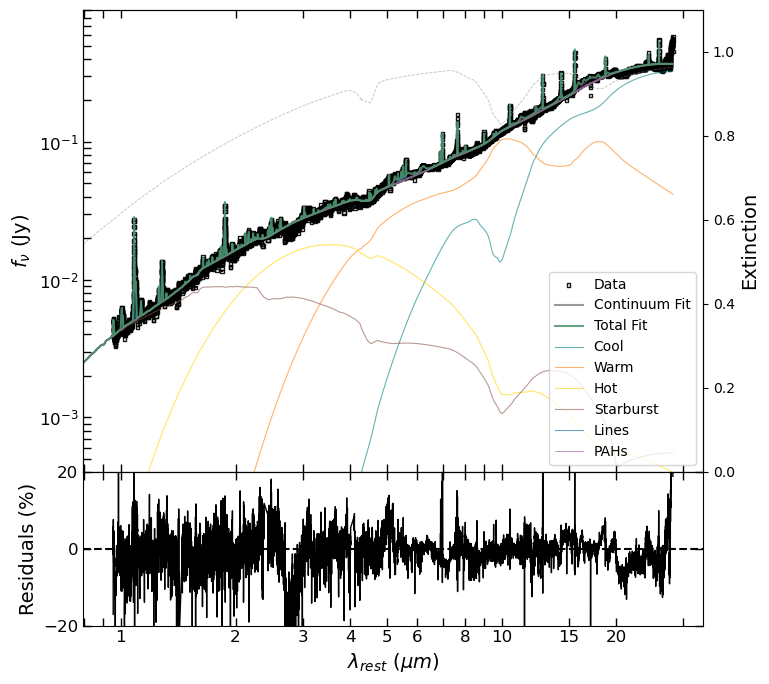

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
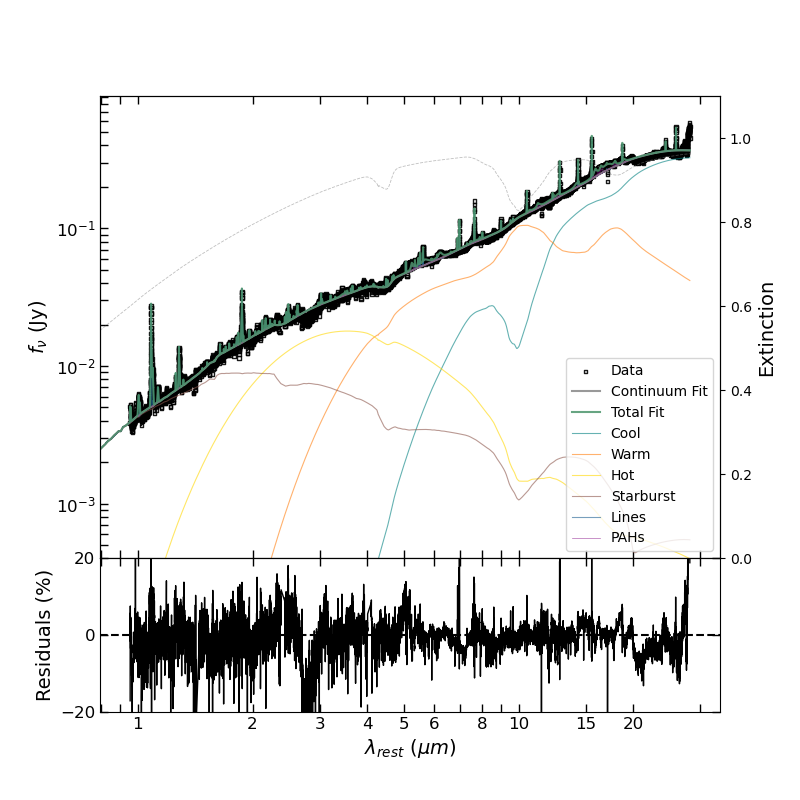

In [8]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [7]:
# Load the parameter cube from drive
parcube_fd = '/Users/tanio/Sync/pywork/CAFE_dev/output/'+source_fnb+'/'
parcube_fn = source_fnb+'_parcube.fits'

In [8]:
s.read_spec(source_fn, file_dir=source_fd, z=z)

Load data: ./CRETA/extractions/NGC7469_SingleExt_0.3as_cube.fits
Filename: ./CRETA/extractions/NGC7469_SingleExt_0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (12894,)   float64   
  2  ERR           1 ImageHDU         7   (12894,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (12894,)   float64   
  4  ERR_ST        1 ImageHDU         7   (12894,)   float64   
  5  DQ            1 ImageHDU         7   (12894,)   float64   
  6  WAVE          1 ImageHDU         7   (12894,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   12894R x 1C   [20A]   


In [9]:
s.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: /Users/tanio/Sync/pywork/CAFE_dev/output/NGC7469_SingleExt_03as_cube/NGC7469_SingleExt_03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 319)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 319)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 319)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 319)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 319)   float64   
  6  EXPR          1 BinTableHDU     13   319R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   319R x 2C   [I, 32A]   


In [15]:
from astropy.io import ascii
from astropy.table import Table
from astropy.table import QTable

# Read output PAH table
pah = cafeio.pah_table(s.parcube, 0, 0)
# Read output line table
line = cafeio.line_table(s.parcube, 0, 0)

pah62 = pah[pah.index == 'PAH62'].pah_strength.values[0]
pah62_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah77 = pah[pah.index == 'PAH77_C'].pah_strength.values[0]
pah77_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah113 = pah[pah.index == 'PAH113_C'].pah_strength.values[0]
pah113_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]

x = pah62 / pah77 
x_unc = pah62 / pah77 * np.sqrt((pah62_unc/pah62)**2 + (pah77_unc/pah77)**2)
y = pah113 / pah77
y_unc = pah113 / pah77 * np.sqrt((pah113_unc/pah113)**2 + (pah77_unc/pah77)**2)

print('6.2/7.7 = {} +/- {}'.format(x, x_unc))
print('11.3/7.7 = {} +/- {}'.format(y, y_unc))

print(pah)

# Make an astropy table 
t = QTable([pah.index.values, pah.pah_strength, pah.pah_strength_unc],
           names = ('pah_complex', 'pah_strength', 'pah_strength_unc'),
           meta={'wavelength': 'micron',
                 'flux': 'W/m^2',
                }
          )

# Write PAH table in an .ecsv file
#t.write('./NGC7469_pah_tbl.ecsv', overwrite=False)

/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_

6.2/7.7 = 1.9052152096105264 +/- 0.20341325033721966
11.3/7.7 = 1.0170016792958958 +/- 0.13483501996222358
             pah_strength  pah_strength_unc
pah_complex                                
PAH113_C     7.200978e-20      1.243585e-20
PAH120       1.812526e-20      1.050750e-20
PAH126_C     6.658324e-20      1.519095e-20
PAH136       0.000000e+00      0.000000e+00
PAH142       8.903702e-20      5.794348e-21
PAH164       7.697581e-20      3.772096e-21
PAH170_C     4.065966e-19      1.952006e-20
PAH33        0.000000e+00      0.000000e+00
PAH62        1.349006e-19      6.693693e-21
PAH77_C      7.080596e-20      1.650850e-20
PAH83        0.000000e+00      0.000000e+00
PAH86        0.000000e+00      0.000000e+00
ali34        6.862468e-20      8.414581e-21
ali345       1.473446e-19      1.129862e-20
